In [ ]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential

[[-4.58257569  1.96396101  0.65465367]
 [ 0.         -4.81070235  2.13808994]
 [ 0.          0.         -2.44948974]]
w [ 5.  1. -2.]
[-4. 15. 19.]
[[ 0.78045434  0.          0.        ]
 [ 0.27960366  0.9983187   0.        ]
 [ 0.5592073   0.05796355 -1.        ]]
[0.78045434 0.27960366 0.5592073 ] [-4. 15. 19.]
[1.5609087 0.5592073 1.1184146] 11.69717663526535
outer [18.258224   6.5411468 13.0822935]
[0.9983187  0.05796355] [8.45885324 5.91770649]
[1.9966373  0.11592711] 8.787642438072783
outer [17.545734  1.018726]
[-1.] [4.8989805]
[-2.] -4.898980498313904
outer [9.797961]
[[-4.58257573e+00  1.96396117e+00  6.54653498e-01]
 [ 8.64227800e-08 -4.81070179e+00  2.13808972e+00]
 [ 1.72845560e-07  8.65827732e-09  2.44948981e+00]]
[ 4.99999984  0.99999978 -2.00000046]


Matrix Q:
[[ 0.9047619   0.2464986  -0.34733894]
 [-0.19047619  0.96358543  0.18767507]
 [-0.38095238  0.10364146 -0.91876751]]


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
x_train.min(), x_train.max()

(0.0, 1.0)

5483


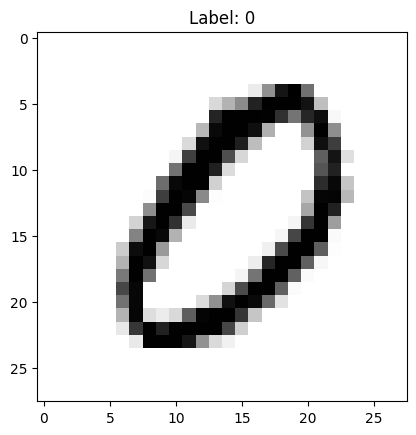

In [ ]:
# First training sample
idx = np.random.randint(0, 10000)
img = x_test[idx]
label = y_test[idx]
print(idx)
# Plot image with class label
plt.imshow(img, cmap="binary")
plt.title("Label: {0}".format(label))
plt.show()

In [ ]:
model = Sequential()

model.add(Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1),padding='same'))
model.add(MaxPooling2D(pool_size=(2,2 )))
model.add(Conv2D(16, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2 )))
model.add(Conv2D(32, (5, 5), activation='relu',padding='same'))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          12832     
                                                                 
 flatten (Flatten)           (None, 1568)              0

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,  epochs=10)

Epoch 1/10
1875/1875 [==============================] - 23s 5ms/step - loss: 0.1515 - accuracy: 0.9521
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0529 - accuracy: 0.9836
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0391 - accuracy: 0.9882
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0290 - accuracy: 0.9909
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0237 - accuracy: 0.9926
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0211 - accuracy: 0.9932
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0175 - accuracy: 0.9944
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0159 - accuracy: 0.9950
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0117 - accuracy: 0.9962
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.01

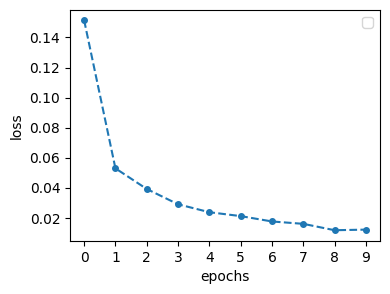

In [ ]:
plt.figure(figsize=(4, 3))
plt.plot(history.history["loss"], linestyle = '--', marker = '.', markersize = 8)
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.xticks(np.arange(0,10))
plt.show()

In [ ]:
y_predicted = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
# Accuracy for test dataset
test_loss, test_acc = model.evaluate(x_test, y_test)
test_acc *= 100

print(f"Test accuracy: {test_acc:.2f}%")

313/313 [==============================] - 1s 3ms/step - loss: 0.0399 - accuracy: 0.9900
Test accuracy: 99.00%
